In [273]:

from __future__ import print_function
import os
import sys

import numpy as np
import pandas as pd

import datetime
from math import sqrt
from math import exp
import math
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
#from keras.models import Sequential
#from keras.models import Model
#from keras.models import load_model
#from keras.callbacks import ModelCheckpoint
#from keras.callbacks import ReduceLROnPlateau
#from keras.callbacks import EarlyStopping

#from keras.layers import Dense,Input, Dropout
#from keras.layers import LSTM
#from keras.layers import Activation
#from keras import optimizers
#import keras.backend as K


from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
import matplotlib.pyplot as plt
from random import gauss
from random import seed
#from pandas import Series
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from random import randrange

from sklearn.cross_validation import train_test_split
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import random
from random import gauss
from random import seed
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
from scipy.stats.stats import pearsonr    


In [274]:
from datetime import datetime
datetime.now().strftime('%m-%d %H:%M')

'07-18 07:57'

In [275]:
import Experiment_Ready as experim

In [276]:
os.getcwd()

'C:\\Users\\murat.ozemre\\Desktop\\Thesis_Project\\Data_Learning_Prediction\\Result_Plots'

In [277]:
Product_Type_Options = [841810,841840,841850]
Product=Product_Type_Options[2] #841810

Productname=Product
Exp_Country='CHN' # 'CHN'
Imp_Country='GBR'

if Exp_Country=='CHN':
    Currency='CNY'
    EXP0='TUR'   
elif Exp_Country=='TUR':
    Currency='TRY'
    EXP0='CHN'   

In [278]:
#Default values

dependenttype='same'
percent=100
MonthSeries="3"

if Exp_Country=='CHN':
        if Product==841810:
            MonthSeries="_34"
            percent=50
            dependenttype='same'
        elif Product==841840:
            MonthSeries="_345"
            percent=50
            dependenttype='log'
        elif Product==841850:
            MonthSeries="_34"
            percent=100
            dependenttype='log'
elif Exp_Country=='TUR':
        if Product==841810:
            MonthSeries="_456"
            percent=50
            dependenttype='same'
        elif Product==841840:
            MonthSeries="4"
            percent=50
            dependenttype='log'
        elif Product==841850:
            MonthSeries="_45"
            percent=50
            dependenttype='same'


In [279]:
os.chdir('C:/Users/murat.ozemre/Desktop/Thesis_Project/Data_Sources_and_Preparation')

Data_Core1 = pd.ExcelFile('Data_{}_{}_{}.xlsx'.format(Exp_Country,Imp_Country,Product))

# For BCG MAtrix Additional Test Set is created for CHN but not for Turkey


y = Data_Core1.parse('Y_Test', header=0,index_col=None, na_values=['NA'])['{}_{}_{}'.format(Exp_Country,Imp_Country,Product)]
Z = Data_Core1.parse('Y_Test', header=0,index_col=None, na_values=['NA'])[['Date','Year','Month']]

X = Data_Core1.parse('X{}_Test'.format(MonthSeries), header=0,index_col=None, na_values=['NA'])
    
X.drop(['Date','Year','Month'], axis=1, inplace=True)

X_Column_Names=list(X.columns.values)
n_feature=X.shape[1]

#y=y.iloc[3:]
#X=X.iloc[3:,:]
#Z=Z.iloc[3:,:]




In [280]:
if dependenttype=='same':
    dependent_variable=y
    print("Same Dependent Variable")
elif dependenttype=='log':
    dependent_variable=y.apply(np.log)
    print("Log of Dependent Variable")
elif dependenttype=='sqrt':
    dependent_variable=y.apply(np.sqrt)
    print("SQRT of Dependent Variable")


Log of Dependent Variable


In [281]:
# Calculate Feature Importace according Month Series
number_of_split_for_feature=100
# For split take only train test for X

#X_train_test_only=X.iloc[:len(y),:]
#X_train_test_only=X

result=experim.get_feature_importance_result (X,dependent_variable,Z,n_feature,number_of_split_for_feature)
scored_feature_indices=result[0]
feature_score=result[1]

In [282]:
# Omit Features according percentage

percentile=100-percent
threshold_for_feature_selection=np.percentile(feature_score[scored_feature_indices], percentile)

# X for all values
X_threshold=X.iloc[:,scored_feature_indices[feature_score[scored_feature_indices]>threshold_for_feature_selection]]
  

In [283]:
# Buraya Kadar Deneme_Result_Plots ile NN-FR Experiments aynı

In [284]:
# Set X train, X test, y train, y test
rs=42 # 841810 -3
lag=0

# en sondaki 4 adet veriyi eğitime sokmamak için
Scaled_Train_Test_Split=experim.X_Y_scaler_train_test_Split(X_threshold.iloc[:len(y)-lag,:],
                                                            dependent_variable[:len(y)-lag],
                                                            Z.iloc[:len(y)-lag,:],random=rs)


X_train = Scaled_Train_Test_Split[0]
X_test = Scaled_Train_Test_Split[1]
y_train = Scaled_Train_Test_Split[2]
y_test = Scaled_Train_Test_Split[3]
scaler_X = Scaled_Train_Test_Split[4]  
scaler_y = Scaled_Train_Test_Split[5]
scaled_value_X=Scaled_Train_Test_Split[6]
scaled_value_y=Scaled_Train_Test_Split[7]

In [285]:
a=experim.randomforest(X_train, X_test, y_train, y_test,scaler_y,est=100,
                       rand=20,is_random_fixed='FALSE',dependenttype=dependenttype)

randomforest rs= 16
R2_Test 0.817 R2_Train 0.967


In [286]:



# Initialize results
repeats=5
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()




# After Training Show Results

In [287]:

    
if Exp_Country=='CHN':
        if Product==841810:
        
            feat= 'auto'
            min_leaf= 1
            max_leaf= 100
            min_impurity= 1e-06
            min_weight= 1e-05
            est= 1000

            #841810 
            rs=31
            limit=20000  
        elif Product==841840:
            feat= 'auto'
            min_leaf= 2
            max_leaf= 100
            min_impurity= 1e-05
            min_weight= 0.001
            est= 200
   
            rs=51
            limit=2500 

        elif Product==841850:
            feat= 'auto'
            min_leaf= 1
            max_leaf= 200
            min_impurity= 1e-05
            min_weight= 0.01
            est= 200
   
            rs=35
            limit= 5000
elif Exp_Country=='TUR':
        if Product==841810:
            
            feat= 'auto'
            min_leaf= 2
            max_leaf= 200
            min_impurity= 1e-06
            min_weight=0.00001

            est= 200

            #841810 
            rs=79
            limit=20000  
        elif Product==841840:
            feat= 10
            min_leaf= 5
            max_leaf= 10
            min_impurity= 0.000001
            min_weight= 0.1
            est= 1000

            #841810 
            rs=92
            limit=5000  
            
        elif Product==841850:
            feat= 10
            min_leaf= 2 
            max_leaf= 100
            min_impurity= 0.000001
            min_weight=0.01
            est= 20000

            #841810 
            rs=4
            limit=  5000

    
#experim.experiment_RandomForest(repeats,
#                  X_train, X_test, y_train, y_test,scaler_y,
#                  rand=20,is_random_fixed='FALSE',dependenttype=dependenttype,
#                  est=est,min_leaf=min_leaf,feat=feat,max_leaf=max_leaf,min_weight=min_weight,min_impurity=min_impurity)[1] 
    

In [288]:
rs=20
print('Tuned Results')
result=experim.randomforest(X_train, X_test, y_train, y_test,scaler_y,
                            rand=rs,is_random_fixed='TRUE',dependenttype=dependenttype,
                            est=est,min_leaf=min_leaf,feat=feat,max_leaf=max_leaf,
                            min_weight=min_weight,min_impurity=min_impurity)

print('Before Tun Results')    
result=experim.randomforest(X_train, X_test, y_train, y_test,scaler_y,
                            rand=rs,is_random_fixed='TRUE',dependenttype=dependenttype
                            )      
rmse_test=result[0][1]
R2_test=result[0][2]
        
rmse_train=result[1][1]
R2_train=result[1][2]

Tuned Results
randomforest rs= 20
R2_Test 0.829 R2_Train 0.954
Before Tun Results
randomforest rs= 20
R2_Test 0.856 R2_Train 0.94


In [289]:
#Hepsini dahil edince
# TUR 841810 R2_Test 0.83 R2_Train 0.96
# TUR 841840 R2_Test 0.196 R2_Train 0.696
# TUR 841850 R2_Test 0.829 R2_Train 0.94



# TUR 841810 R2_Test 0.765 R2_Train 0.965
# TUR 841840 R2_Test 0.341 R2_Train 0.719
# TUR 841850 R2_Test 0.452 R2_Train 0.941
# CHN 841810  R2_Test 0.623 R2_Train 0.956
# CHN 841840 R2_Test 0.487 R2_Train 0.924
# CHN 841850 R2_Test 0.931 R2_Train 0.947

In [290]:
rfc=RandomForestRegressor(n_estimators=est,
                              min_samples_leaf=min_leaf,
                              random_state =rs,
                              max_features=feat,
                              max_leaf_nodes=max_leaf,
                              min_weight_fraction_leaf =min_weight,
                              min_impurity_decrease=min_impurity
                            )
   
RandomForestRegressor.fit(rfc,X_train,y_train)
    
y_predict_test = rfc.predict(X_test)
y_predict_train = rfc.predict(X_train)
y_predict=rfc.predict(scaled_value_X.iloc[:len(y),:])

#if Exp_Country=='CHN':
y_predict_future=rfc.predict(scaled_value_X.iloc[len(y)-6:,:])

# Inverse for test train and all data
result_test=experim.inverse_scale_and_graph_Y_predict_and_test(y_predict_test,y_test,scaler_y,'NO',dependenttype)
result_train=experim.inverse_scale_and_graph_Y_predict_and_test(y_predict_train,y_train,scaler_y,'NO',dependenttype)
result_all=experim.inverse_scale_and_graph_Y_predict_and_test(y_predict,scaled_value_y,scaler_y,'NO',dependenttype)


inv_y_train=pd.Series(result_train[4])
inv_y_predict_train=pd.Series(result_train[5])
R2_train=result_train[3]
inv_y_test=pd.Series(result_test[4])
inv_y_predict_test=pd.Series(result_test[5])
R2_test=result_test[3]
inv_y_all=pd.Series(result_all[4])
inv_y_predict_all=pd.Series(result_all[5])
R2_all=result_all[3]

print('R2_train',R2_train, 'R2_test',R2_test,'R2_all',R2_all )

if Exp_Country=='CHN' or Exp_Country=='TUR':
    # Inverse for future data
    y_predict_future=y_predict_future.reshape(-1, 1)
    predictions = scaler_y.inverse_transform(y_predict_future)
    inv_y_predict_future=predictions.flatten()
  

    if dependenttype=='same':
        con_y_predict_test=inv_y_predict_future
    elif dependenttype=='log':
        con_y_predict_test=[exp(num) for num in inv_y_predict_future]
    elif dependenttype=='sqrt':
        con_y_predict_test=[num**2 for num in inv_y_predict_future]

    inv_y_predict_future=con_y_predict_test   




R2_train 0.96 R2_test 0.789 R2_all 0.903


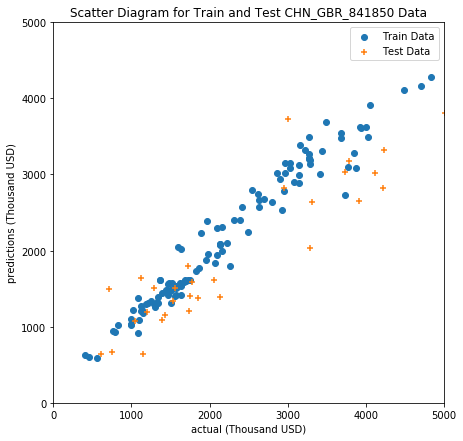

In [291]:

os.chdir('C:/Users/murat.ozemre/Desktop/Thesis_Project/Data_Learning_Prediction/Result_Plots')
fig = plt.figure(figsize=(7, 7))

plt.scatter(inv_y_train,inv_y_predict_train,label='Train Data')
plt.scatter(inv_y_test,inv_y_predict_test,marker='+' ,label='Test Data')

plt.legend()
plt.xlim(0, limit)
plt.ylim(0, limit)
plt.title("Scatter Diagram for Train and Test {}_{}_{} Data".format(Exp_Country,Imp_Country,Productname))
plt.xlabel("actual (Thousand USD)")
plt.ylabel("predictions (Thousand USD)")
plt.savefig('Scatter Diagram {}_{}_{}.png'.format(Exp_Country,Imp_Country,Productname))
plt.show()



In [292]:
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = tick_number # int(np.round(2 * value / np.pi))
    
    if N == 1:
        return "200604"
    elif N == 2:
        return "200712"
    elif N == 3:
        return "200908"
    elif N ==4: 
        return "201104"
    elif N == 5:
        return "201212"
    elif N == 6:
        return "201408"
    elif N == 7: 
        return "201604"
    elif N == 8: 
        return "201712"
    else:
        return ""

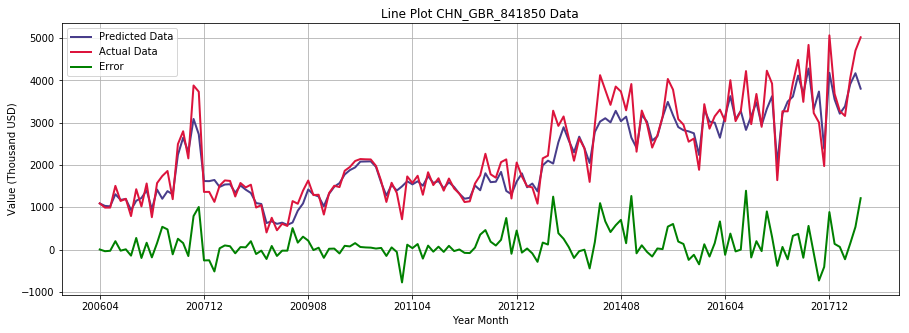

In [293]:
real=inv_y_all
predict=inv_y_predict_all

error=real-predict


fig = plt.figure(figsize=(15, 5))

ax = plt.axes()
x = Z['Date']
xi = [i for i in range(0, len(x))]


ax.plot(xi, predict, lw=2, color='darkslateblue',label='Predicted Data')
ax.plot(xi, real, lw=2, color='crimson', label='Actual Data')

ax.plot(xi, error, lw=2, color='green', label='Error')

# Set up grid, legend, and limits
ax.grid(True)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.legend(frameon=True), 
plt.title("Line Plot {}_{}_{} Data".format(Exp_Country, Imp_Country,Productname))
plt.xlabel('Year Month')
plt.ylabel('Value (Thousand USD)') 

plt.savefig('Line Plot {}_{}_{}.png'.format(Exp_Country,Imp_Country,Productname))

In [294]:
inv_y_all.iloc[135:]

135    3491.001691
136    4836.999790
137    3226.000839
138    3003.000829
139    1973.000168
140    5063.000457
141    3683.000004
142    3274.001344
143    3158.001234
144    4052.999798
145    4702.998325
146    5016.998175
dtype: float64

In [295]:
inv_y_predict_future

[3549.2867939971716,
 3211.342943872403,
 3386.9309498335447,
 3910.1703807062327,
 4167.958256184074,
 3802.8993213923777]

In [296]:
inv_y_predict_all.iloc[135:]

135    3685.167069
136    4277.811212
137    3316.329110
138    3735.491841
139    2384.227941
140    4177.567548
141    3549.286794
142    3211.342944
143    3386.930950
144    3910.170381
145    4167.958256
146    3802.899321
dtype: float64

In [297]:
#TUR 
# 841810

#201803 - 7479.84717487,  
#201804 - 9818.65161552,  
#201805- 9319.58659757,
#201806 - 10666.23343132

# 841840
#135    2450.215410
#136    2412.266238
#201803 -   2580
#201804 -  2613
#201805-  3025
#201806 - 

# 841850
#137    1897.986336
#138    1957.960376
#139    1694.103558
#201803 -   2030
#201804 -  2371
#201805-   2548
#201806 - 2649


In [298]:
#CHN
# 841810
#141    13139.621904
#142    12722.146073
#143    12152.009882
# [12869, 12334, 12427 ]
# 841840
#140    1820.114674
#141    1741.121139
#142    1653.749971
#143    1566.685755
#[1707, 1650, 1573]
# 841850
#141    2927.422839
#142    3222.260451
#143    3361.269723
# [3329, 3280, 3436]

In [299]:
Deneme_Sonuc =  DataFrame(columns='Date Real Predict'.split())


In [300]:
Deneme_Sonuc['Real']=real

In [301]:
Deneme_Sonuc['Predict']=predict

In [302]:
Deneme_Sonuc['Date']=Z['Date']

In [303]:
os.chdir('C:/Users/murat.ozemre/Desktop/Thesis_Project/Data_Learning_Prediction/Result_Plots')

writer = pd.ExcelWriter('Predictions{}_{}_{}.xlsx'.format(Exp_Country,Imp_Country,Productname))
Deneme_Sonuc.to_excel(writer,'Sonuc')
writer.save()